In [119]:
using Flux
using Flux: params, sigmoid, logitbinarycrossentropy
using BSON: @load
using Plots
using MLDatasets
using Images

In [120]:
include("./vaemodel.jl")

trainVAE (generic function with 1 method)

In [181]:
@load "models/workingintrain25" model

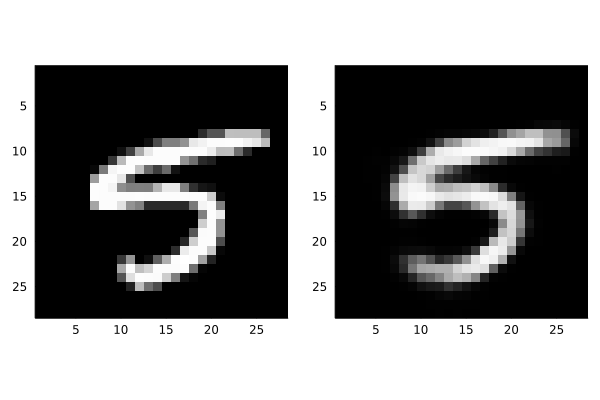

In [208]:
img = MNIST(Float32, :test).features[:, :, convert(Integer, ceil(5000.0*rand()))]
recovered_img = reshape(sigmoid.(model(reshape(img, :), 100)), 28, 28)
plot(
    plot(colorview(Gray, img)'),
    plot(colorview(Gray, recovered_img)')
)

In [270]:
include("compressedsensing.jl")

singlerecoveryfourierexperiment (generic function with 1 method)

In [217]:
truesignal = reshape(MNIST(Float32, :test).features[:, :, convert(Integer, ceil(5000.0*rand()))], 28^2, :)
aimedm = 500
n = 28^2
k = 16
F = samplefourierwithoutreplacement(aimedm, n)
measurements = F*truesignal;
fullmodel = sigmoid ∘ model.decoder


NNlib.σ ∘ Chain(Dense(16 => 512, relu; bias=false), Dense(512 => 512, relu; bias=false), Dense(512 => 784; bias=false))

In [278]:
recovery = recoversignal(measurements, F, fullmodel, k, tolerance=5e-4);

┌ Info: final stats
│   error = 0.0009978035639301
│   iter = 1691
└ @ Main /Users/matthewscott/Prog/GNN_Isometries/reusefiles/compressedsensing.jl:39


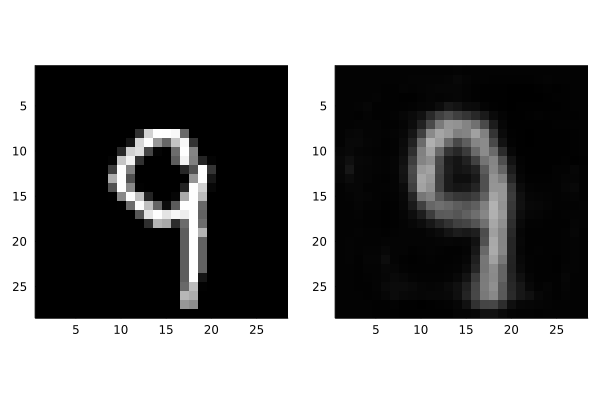

In [277]:
plot(plot(colorview(Gray, reshape(truesignal, 28,28))'), plot(colorview(Gray, reshape(recovery, 28,28))'))

# Tolerances
<  1e-3:   no recovery
1e-3: rough recovery (good in agregate), 3 to 10s
5e-4: good recovery, 20s          <-------------------  pick this
1e-4: slightly better recovery?, 30s